## Saving a Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [1]:
# Make sure we've got the latest version of fastai:
#!pip install -Uqq fastai

First, import all the stuff we need from fastai:

In [2]:
from fastai.vision.all import *

Download and decompress our dataset, which is pictures of dogs and cats:

In [3]:
path = untar_data(URLs.PETS)/'images'

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [4]:
def is_cat(x): return x[0].isupper() 

Now we can create our `DataLoaders`:

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

... and train our model, a resnet18 (to keep it small and fast):

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.183477,0.039159,0.012855,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.059114,0.047540,0.013532,00:05
1,0.049178,0.014573,0.004736,00:05
2,0.023519,0.010429,0.003383,00:05


Now we can export our trained `Learner`. This contains all the information needed to run the model:

In [7]:
learn.export('model.pkl')

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

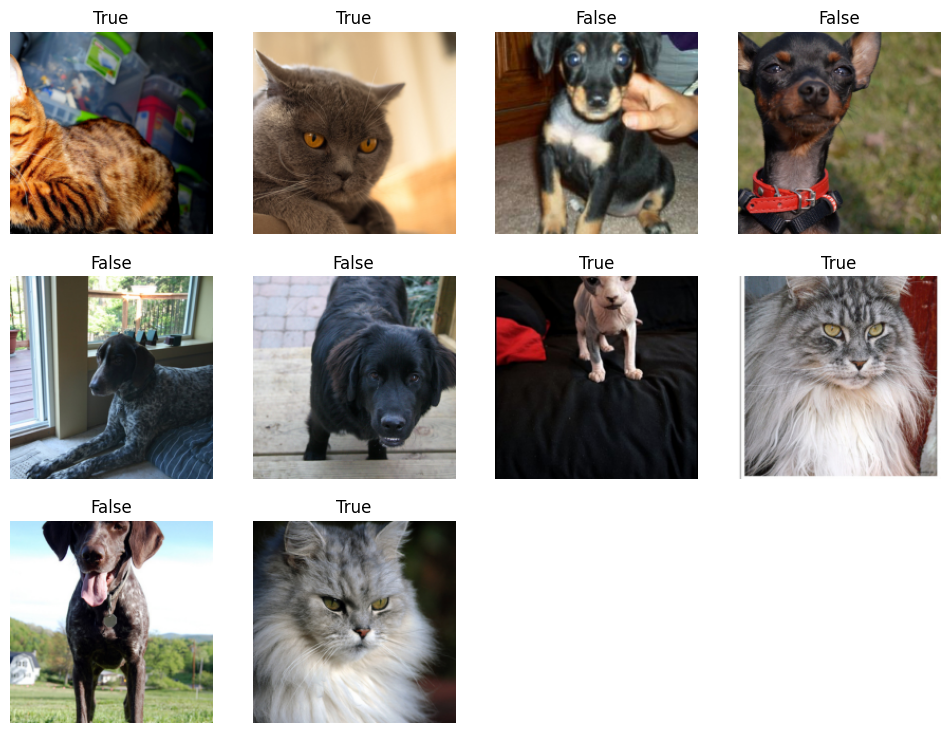

In [10]:
dls.show_batch(max_n=10)